# Obama & The Onion: Word Art

To accomodate the text based analysis, I created word-based visuals. I'm very intentionally not calling these wordclouds. Wordclouds are not analysis; they are often a deceitful way to present analysis. (See [this story](http://www.niemanlab.org/2011/10/word-clouds-considered-harmful/) and [this Data Skeptic podcast](dataskeptic.com/blog/episodes/2016/kill-the-word-cloud) for more.)

Thus, I'm calling these WordArt. (Sorry, [Microsoft Word](https://i-technet.sec.s-msft.com/dynimg/IC354451.jpg).)

**These visuals are meant to be aesthetically pleasing, not a form of analysis.**

(Created via amueller's WordCloud library - view library on [Github](https://github.com/amueller/word_cloud))

In [1]:
# grab libraries
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# grab the cleaned data
obama = pd.read_csv('../obama_cleaned.csv')

In [3]:
# create a giant list of all the text
all_text = []
for x in obama.body:
    all_text.append(x)

In [4]:
# format it into unicode
text = unicode(all_text)

In [5]:
# how much we got?
len(text)

623270

In [6]:
# create grey color function
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)

In [7]:
# create green coloring function (like The Onion)
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(135, 60%%, %d%%)" % random.randint(25, 60)

### Onion Logo

In [8]:
# set mask to be inverted Onion logo
mask = imread('theonion_logo_inverted.png')

In [9]:
# create the wordcloud
wc = WordCloud(max_words=300, background_color='white', mask=mask, stopwords=STOPWORDS, margin=10,
               random_state=1).generate(text)

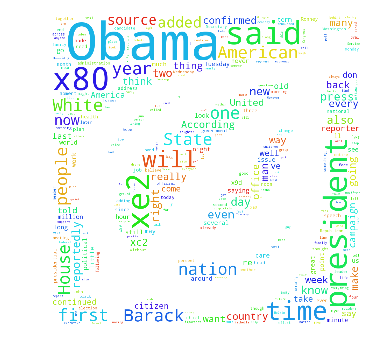

In [10]:
# view it without axes
plt.imshow(wc)
plt.axis("off")
plt.figure()

In [11]:
# add weird encoding texts to stopwords
stopwords = set(STOPWORDS)
stopwords.add("xe2")
stopwords.add("x80")

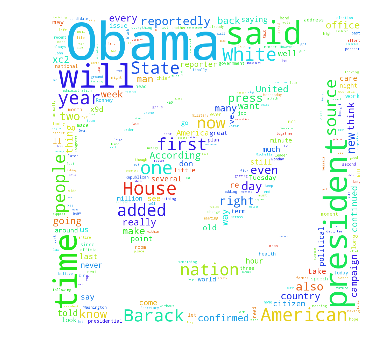

In [12]:
# regenerate wordcloud using new stopwords list
wc = WordCloud(max_words=300, background_color='white', mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# show it
plt.imshow(wc)
plt.axis("off")
plt.figure()

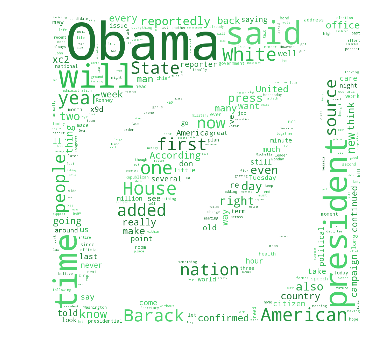

In [13]:
# recolor to only be green colors
wc.recolor(color_func=green_color_func, random_state=3)
# show it
plt.imshow(wc)
plt.axis("off")
plt.figure()

### Capitol

In [14]:
# set mask to be the Capitol 
mask = imread('capitol-silhoutte.png')

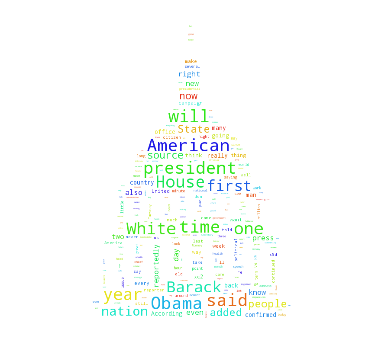

In [15]:
# generate wordcloud using previous settings PLUS a max_font_size of 40
wc = WordCloud(max_words=300, background_color='white', max_font_size=40, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# show it
plt.imshow(wc)
plt.axis("off")
plt.figure()

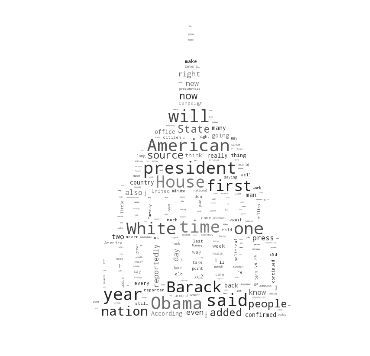

In [16]:
# recolor to only be grey colors
wc.recolor(color_func=grey_color_func, random_state=3)
# show it
plt.imshow(wc)
plt.axis("off")
plt.figure()

### Obama Portrait

In [17]:
# set mask to be the fourth Obama portrait (trust me, I tried the others) 
mask = imread('obama_portrait4.png')

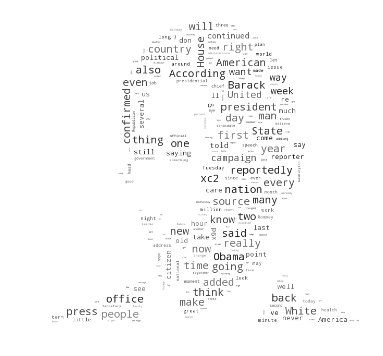

In [18]:
# generate wordcloud using previous settings reducing a max_font_size of 20
wc = WordCloud(max_words=300, background_color='white', max_font_size=20, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# recolor to only be grey colors
wc.recolor(color_func=grey_color_func, random_state=3)
# show it
plt.imshow(wc)
plt.axis("off")
plt.figure()

### Obama Logo

For this one, I'm going to use the colors of the original logo for the wordart colors.

In [19]:
# set mask to be the fourth Obama portrait (trust me, I tried the others) 
mask = imread('obama-logo.png')

In [24]:
# create a color array out of an image - dang modern computing is impressive
obama_coloring = np.array(Image.open("obama-logo.png"))

In [21]:
wc = WordCloud(max_words=300, background_color='white', max_font_size=20, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)

In [22]:
image_colors = ImageColorGenerator(obama_coloring)

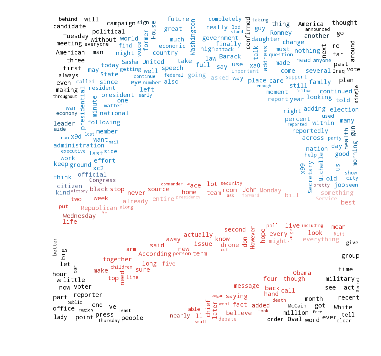

In [23]:
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.show()

Nice.